# Introduction to R

In this short workshop we will assume that people have a basic knowledge of R. If you're new to R, there are many excellent free resources out there, such as the books

* Grolemund, G. (2014). Hands-on programming with R. O'Reilly. [Companion website.](https://rstudio-education.github.io/hopr/)
* Wickham, H., & Grolemund, G. (2016). R for data science: Import, tidy, transform, visualize, and model data (First edition). O’Reilly. [Companion Website.](https://r4ds.hadley.nz/)

If you're following this tutorial, chances are you have already visited the [Github repository](https://github.com/surveygraph) for surveygraph, where we maintain our [tutorial](https://github.com/surveygraph/surveygraph-tutorials) materials, such as notebooks.

## R development environments

R is an interpreted language, which means that the language itself requires some sort of application to execute it before it is useful. There are several such applications, each with its pros and cons.

In this workshop I'll be working from what's called a jupyter notebook. The following are different ways of interfacing with the R language, meaning the underlying language and syntax is the same, we're just reading and writing it in different applications.

![An image](https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/ICSIH/figs/logos.jpg)

### R interpreter in a shell

The most minimal R development environment. It requires installing R and having access to a terminal application. One opens the R interpreter from the command line, and enters commands at the prompt. We can also execute scripts through the same command line, scripts being text files containing R code to be executed sequentially. These files have a .R extension.

R is managed by the [CRAN project](https://cran.r-project.org), which develops the base R language as well as manages the package archive. Detailed documentation can be found on the CRAN website.

### Rstudio

[RStudio](https://posit.co/download/rstudio-desktop/) is an integrated development environment, or IDE, for the R programming language, and provides tools for coding, debugging, and visualising data. It is probably the most well known IDE for R. Installing Rstudio does not necessarily install R.

### Shiny apps

[Shiny](https://shiny.posit.co) apps are interactive web applications built using the Shiny package in R, allowing users to create dynamic and responsive data visualizations and dashboards directly from R scripts. It is not a development environment like Rstudio, but a convenient way of interacting with the R language.

### Jupyter notebooks with an R kernel

[Jupyter notebooks](https://jupyter.org/try), and now JupyterLab, allow a readable mix of code, text, and figures. Text can be formatted in markdown. It requires installing R as well as Jupyter, as well as configuring with the R package _IRkernel_. They run locally in a web browser. The file extension is .ipynb, similar to .json, revealing its previous name, IPython notebooks.

Clicking or double clicking a cell allows one to edit its contents. A key binding such as Shift + enter executes the contents of a cell. The output, if any, will appear directly below the cell.

### Google Colab

[Google Colab](https://colab.google) is a cloud-based platform that allows users to write and execute Python and R code in Jupyter notebooks without any setup or configuration. It provides free access to modest computing resources. It is useful in workshop and collaborative settings, as well as a useful backup if you cannot work locally.

## Getting information about objects
One of the most terrifying things about R for beginners is that objects are invisible and inscrutable: so you don't know automatically what objects exist and, even if you do, it's not clear from their names what they are or what their structure is. (And, for this reason, it is important to use meaningful and descriptive names for objects).

If you are using RStudio you can view the objects and their structure in various panels in the graphical interface. But if you are in a Jupyter notebook or base R you will need some commands.

Let's create a couple of objects.

In [1]:
var1 <- 256
var2 <- "hello world"

The cell above was our first look at a code cell, that is, one that actually contains R code and not just markdown text. We can add text annotations to code with a pound sign, #. These are called comments.

In [2]:
var3 <- 512 # this is a comment
# this is also a comment

### Listing the objects in an R environment

In R, the _environment_ is the global data structure that manages the storage and organization of variables, functions, and their values, defining the scope within which these objects are accessible and can interact. A _session_ refers to an active instance of the R environment, where users can execute and track their code and analysis. 

The built in `ls()` function in R will list all of the objects in the working environment.

In [3]:
ls()

[1] "var1" "var2" "var3"

### Returning the type of an object

The function `typeof()` returns the "type" of an object. Types are integers, doubles, floats, characters, logical.

Each type allows `NA`, which is important in survey data, used to represent missing data.

In [4]:
vec1 <- c('h', 'e', 'l', 'l', 'o')
typeof(vec1)

vec2 <- c(NA, FALSE, TRUE, TRUE)
typeof(vec2)

vec3 <- c(NA, 1, 4, 6.9)
typeof(vec3)

[1] "character"

[1] "logical"

[1] "double"

### Returning the structure of an object

`str()` will summarise the structure of the object. e.g. Is it a character or integer? A vector or an array? This is especially useful for checking the structure of objects returned from functions.

Let's assign a new object, and check that it appears in the environment.

In [5]:
str(var1)
str(var2)

 num 256
 chr "hello world"


## Types of R objects

We give an introduction to the types of data structures, or objects, that are most useful to the surveygraph workflow. The different types of R objects that we'll use are vectors and dataframes. They contain elements whose types are the same, such as integers, characters, floating points. Vectors are indexed from 1. 

### Integer, double and character types

These are the basic types of data

In [6]:
var1 <- 35
typeof(var1)

var2 <- as.integer(34)
typeof(var2)

Each data type can take the value NA, which we will frequently see in survey data.

In [7]:
var3 <- NA
var3

### Vectors

Vectors build upon the basic types. The R language includes the so-called combination function `c()`, which returns a vector composed of the arguments of the function. For example,

In [8]:
vec1 <- c(1, 2, 2, 3)
str(vec1)

In [9]:
vec2 <- c('a', 1, 3)
str(vec2)

In [10]:
vec3 <- c(3.14159, 1.0, 2.0)
str(vec3)

### Dataframes

This is the basic tabular data structure in R, and it is the main data type that we use them in _surveygraph_. The graph visualisation package _igraph_ also reads in dataframes.

In [2]:
df1 <- data.frame(c(1, 2, 4), c(1, 3, 9))
# df1

Now to give the columns names we write

In [12]:
df1 <- data.frame(col1 = c(1, 2, 4), col2 = c(1, NA, 9))
df1

## Installing and loading packages

In this workshop, every package we need is on the CRAN archive of R packages. There are other way to install packages, but this is the simplest and most convenient. 

`install.packages()` is a base R function, which we can call to install a package that is on CRAN. This function will display an error message if the package name in the parentheses is not hosted on CRAN.

In [16]:
install.packages("surveygraph")

Installing package into ‘/opt/homebrew/lib/R/4.4/site-library’
(as ‘lib’ is unspecified)



Part of the installation involves compiling C++ source code. In large packages this process can take some time, but _surveygraph_ is pretty lightweight. Installation it should only take a few seconds.

On a given computer, a package only needs to be installed once. However, we need to load the package each time we start an R session our interpreter of choice (Rstudio, JupyterLab etc). To do this we call the `library()` function.

In [4]:
library("surveygraph")

## Data exploration and plotting

Most of our visualisation will be done using the igraph package, but before we get to that it's helpful to do basic data exploration in R. This is so-called base R, fancier plots can be produced with packages like _ggplot_, but we won't go into that.

### Loading data

Let's read in a dataset that we have on our machine.

In [ ]:
df <- read.csv(

# Introduction to graphs

In this section we take a first look at working with network data in R. We use the term graphs and networks interchangably. Some researchers distinguish between the two by saying that graphs are a purely mathematical object, and that networks are real-world graphs.

Let us install and load the _igraph_ package.

### Network data and visualisation

### Definitions

![an image](https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/ICSIH/figs/graphs.jpg)

#### graph

A graph _G_ = (_V_, _E_) is defined as a set of nodes denoted by _V_, together with a set of edges denoted by _E_. If nodes _u_ and _v_ are elements of _V_, then an edge (_u_, _v_), which is simply a pair of nodes, is a possible element of _E_. 

For example, if we define a node set to be _V_ = {_Sam_, _Ana_, _Caoimhe_}, then a valid edge set corresponding to that node set is _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_)}. Another valid edge set is the empty set E = {}, and the complete graph _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_)}, where every possible edge is present.

In an undirected graph, the edge (_Sam_, _Caoimhe_) is different to (_Caoimhe_, _Sam_). We introduce direction when it is meaningful in our modelling. For instance, if we wanted to describe who has emailed whom in the last day, we might introduce the edge set _E_ = {(_Sam_, _Ana_), (_Ana_, _Sam_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_)}.

In a weighted graph, we associate a numerical value, called a weight, with each edge. We denote this with a triple, (_u_, _v_, _w_). For example, let's use a graph to describe how many emails were exchanged between us over the last week. Assuming _V_ is the same as before, we have _E_ = {(_Sam_, _Ana_, 6), (_Sam_, _Caoimhe_, 4)}.

#### node

A node is any element of the node set _V_. In the above example, the nodes are _Sam_, _Ana_ and _Caoimhe_. A synonym of node is vertex.

An isolated node is a node that does not form part of an edge.

#### edge

An edge is any element of the edge set _E_. In the above example, the edges are (_Sam_, _Ana_) and (_Ana_, _Caoimhe_). Synonyms of edge are link, arc, tie, or bond.

#### neighbour

A node _v_ is a neighbour of a node _u_ if there is an edge between them. This means that (_u_, _v_) is an element of the edge set _E_ of the corresponding graph.

#### degree

The degree of a node is the number of neighbours that it has. The average degree is a very simple descriptor of graph structure.

#### component

A component, or connected component, of a graph is a maximal set of nodes such that any pair of nodes in the set are connected by a path. 

The largest connected component, or lcc of a graph is the largest such set of nodes. A fully connected graph consists of a single component.

#### density

The density of a graph refers to the fraction of edges that are present, compared to the total number of edges that are possible for a given edge set _V_. For example, if the graph (_V_, _E_) is undirected, and _V_ = {_Sam_, _Ana_, _Caoimhe_} as before, then there are three allowed edges, (_Sam_, _Ana_), (_Ana_, _Sam_), (_Ana_, _Caoimhe_) and (_Sam_, _Caoimhe_).

If no edges are present, E = {}, we say the graph is empty and the density is 0. If one or two edges are present, the density is 0.33 or 0.66 respectively. If all edges are present, the density is 1, and we say the graph is complete.

Related terms are sparse and dense, meaning densities close to 0 and 1, respectively.

<div class='sidenote-cell'>
    <b>Side note</b>
    <br><br>
    <b>Social network density and Dunbar's number</b>
    <br><br>
    Let's denote the average degree of a network by $z$. Dunbar's theory posits that humans can maintain stable social relationships with approximately $z \approx 150$ people, a number derived from correlating primate brain size with social group size. This limit, known as Dunbar's number, reflects the cognitive capacity required to manage social bonds and maintain cohesive communities.
    <br><br>
    Consider that as a social system increases in size $n$, following Dunbar's theory the average degree $z$ remains constant, such that the number of edges $zn / 2$ in the network increases linearly with $n$. Since the total number of possible edges is $n(n - 1) / 2$, the edge density $d(n)$ is
    \begin{equation}
        d(n) = \dfrac{zn / 2}{n(n - 1) / 2} = \dfrac{z}{n - 1}.
    \end{equation}
    As such, in the large $n$ limit, the edge density $d(n)$ goes to $0$.
</div>

### Graph data formats

There are two main ways of describing a graph numerically. Let's assume we have a node set that we extend to include _Paul_, so we now have _V_ = {_Sam_, _Ana_, _Caoimhe_, _Paul_}, and assume an edge set _E_ = {(_Sam_, _Ana_), (_Ana_, _Caoimhe_), (_Sam_, _Caoimhe_), (_Caoimhe_, _Paul_)}.

#### Neighbour list

In a neighbour list, for each node _u_ we list its neighbours.

|_u_|neighbours of _u_|
|:-|:-|
|_Sam_|_Ana_, _Caoimhe_|
|_Ana_|_Sam_, _Caoimhe_|
|_Caoimhe_|_Sam_, _Ana_, _Paul_|
|_Paul_|_Caoimhe_|

#### Edge list

In an edge list, we simply list the edges (_u_, _v_). In a weighted edge list, we list the weighted edges (_u_,_v_,_w_). Introducing weights to the example above we have

|_u_|_v_|_w_|
|:-|:-|:-|
|_Sam_|_Ana_|6|
|_Sam_|_Caoimhe_|7|
|_Ana_|_Caoimhe_|9|
|_Caoimhe_|_Paul_|1|

Provided a graph in one format it is straightforward to map to another. We will use edge lists, which have the advantage of being regular, in the sense that each row has the same number of columns. In R, dataframes are well suited to storing edge lists, since they are regular.

We can write the above example as follows.

In [18]:
# read the variable el1 as "edge list 1"
el1 <- data.frame(
    u = c('Sam', 'Sam', 'Ana', 'Caoimhe'), 
    v = c('Ana', 'Caoimhe', 'Caoimhe', 'Paul'), 
    w = c(6, 7, 9, 1)
)

In the final line we've used the combination function `c()` to concatenate columns _u_ and _v_ of the edge list, then the `unique()` function to remove repeated entries from the resulting vector.

In [19]:
Vinferred <- unique(c(el1$u, el1$v))

### A comment on isolated nodes

When using edge lists, we need to remember to take into account potentially isolated nodes. That is, since they do not form part of an edge, isolated nodes don't appear in an edge list. They may nevertheless be meaningful. Give example.

## Visualising graph data with _igraph_

In [21]:
library("igraph")

The message above looks scary, but we can ignore it. It is telling us that we've loaded a library that introduces a function with the same name as something else in our environment. Since we aren't using these functions, we won't worry too much about them.

In [22]:
el2 <- read.csv("https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/ICSIH/data/zachary.csv")

As an exercise, let's see using the `names()` function what name R has given to the columns of the dataframe. This function returns the column names of a dataframe.

In [23]:
# initial names of dataframe 
names(el2)

# rename to 'u' and 'v'
names(el2) <- c('u', 'v')

# new names of dataframe 
names(el2)

[1] "X1" "X2"

[1] "u" "v"

In [24]:
Vinferred <- unique(c(el2$u, el2$v))

g <- graph_from_data_frame(el2, vertices = Vinferred, directed=FALSE)

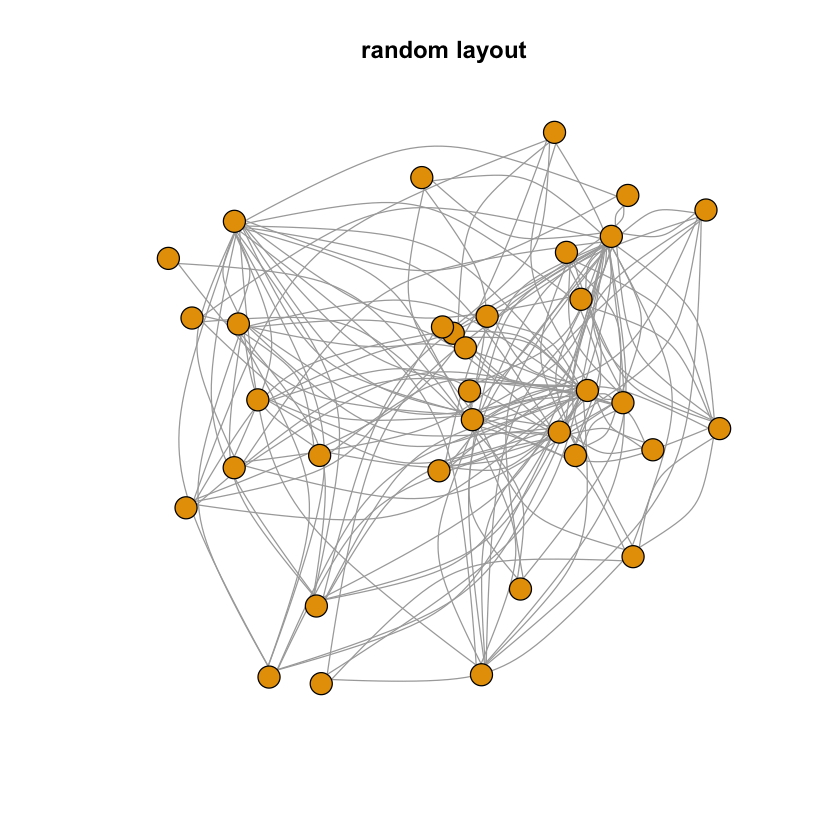

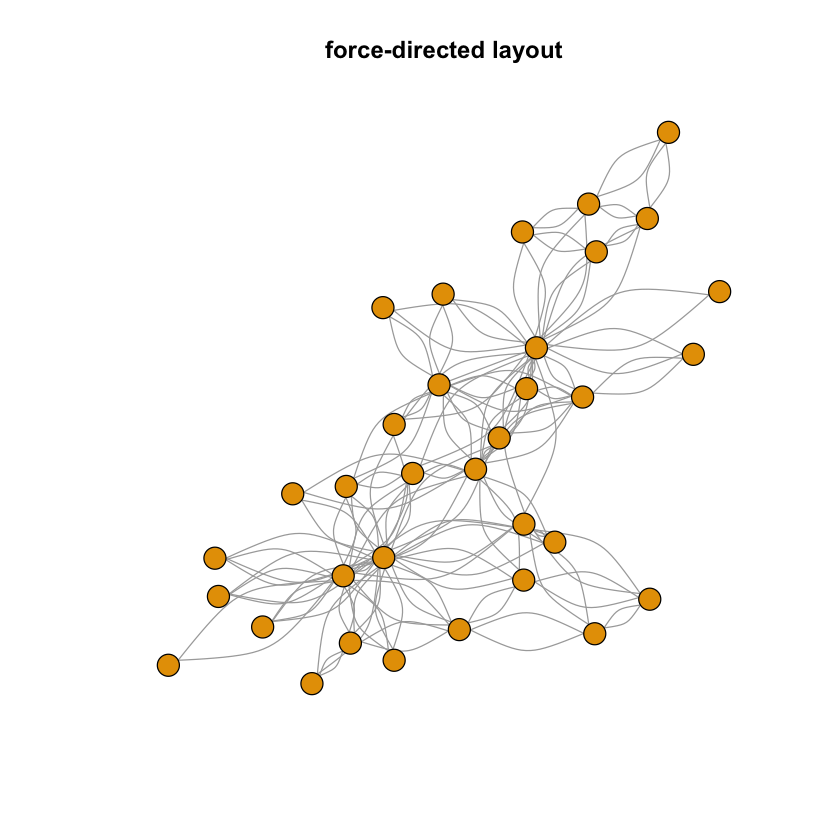

In [25]:
plot(
    g,
    vertex.size=8, 
    vertex.label=NA, 
    edge.width=1,
    layout=layout.random,
    main="random layout"
)

plot(
    g,
    vertex.size=8, 
    vertex.label=NA, 
    edge.width=1,
    layout=layout.fruchterman.reingold,
    main="force-directed layout"
)

Note that many graph layouts have an element of stochasticity, so the precise layout may not be the same with every realisation of a code snippet.

## Community detection

We briefly describe some popular community detection algorithms, providing the computational complexity of the runtime of each. This is expressed in terms of the number of edges and nodes in the graph, $m$ and $n$ respectively.

### Newman-Girvan

This algorithm works by progressively removing edges with the highest betweenness centrality, thereby breaking down the network into subnetworks that reveal community structures. 

It is implemented in the `cluster_edge_betweenness()` function in _igraph_, with worst-case complexity $\mathcal{O}(m^2 n)$.

### Louvain

The Louvain algorithm works by iteratively optimizing modularity, which measures the density of links inside communities compared to links between communities, through hierarchical clustering.

It is implemented in the `cluster_louvain()` function in _igraph_, with worst-case complexity $\mathcal{O}(n \log n)$.

### Walktrap

The walktrap algorithm works by simulating random walks on the network, clustering nodes based on the probability of being visited together, thereby capturing community structures through local navigation patterns.

It is implemented in the `cluster_walktrap()` function in _igraph_, with worst-case complexity $\mathcal{O}(m n^2)$.

### Example using walktrap

We construct a model graph with defined community structure using the so-called stochastic block model, implemented by _igraph_ under the `sample_sbm()` function. This is a simple network model that specifies a number of distinct node types, as well as the densities of connections between nodes of the same type, and nodes of different types. 

In [26]:
g <- sample_sbm(
    800, 
    pref.matrix=cbind(c(.015, .001), c(.001, .08)), 
    block.sizes=c(600, 200)
)

Plotting a stochastic block model graph reveals clear community structure.

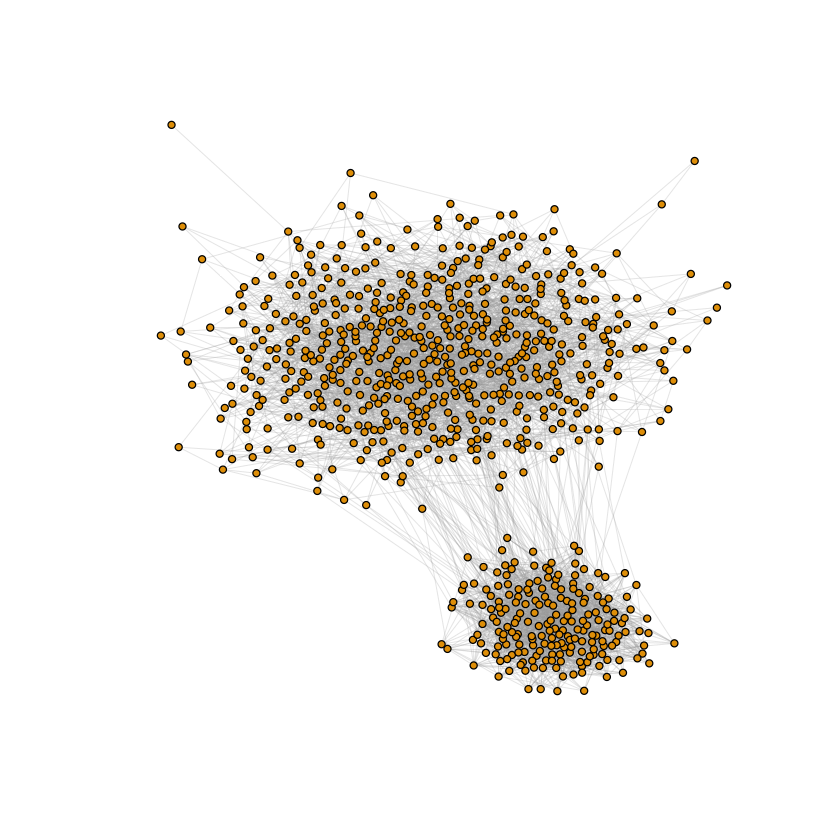

In [27]:
plot(
    g,
    vertex.size=2.5, 
    vertex.label=NA, 
    edge.width=0.2,
    layout=layout.fruchterman.reingold
)

We now apply the walktrap algorithm to see if it can detect the two clusters.

In [28]:
walktrap <- cluster_walktrap(g, steps=4)

This returns an _igraph_ object containing the inferred community labels, among other data pertaining to the algorithm.

In [29]:
str(walktrap)

Class 'communities'  hidden list of 5
 $ merges    : num [1:799, 1:2] 778 664 654 707 602 617 610 760 747 692 ...
 $ modularity: num [1:800] -0.001492 -0.001267 -0.001043 -0.000819 -0.000595 ...
 $ membership: num [1:800] 1 1 1 1 1 1 1 1 1 1 ...
 $ vcount    : num 800
 $ algorithm : chr "walktrap"


We set the node colour attribute in our graph using the `walktrap$membership` vector,

In [30]:
V(g)$color <- walktrap$membership

and plot, revealing a high-accuracy assignment of node community.

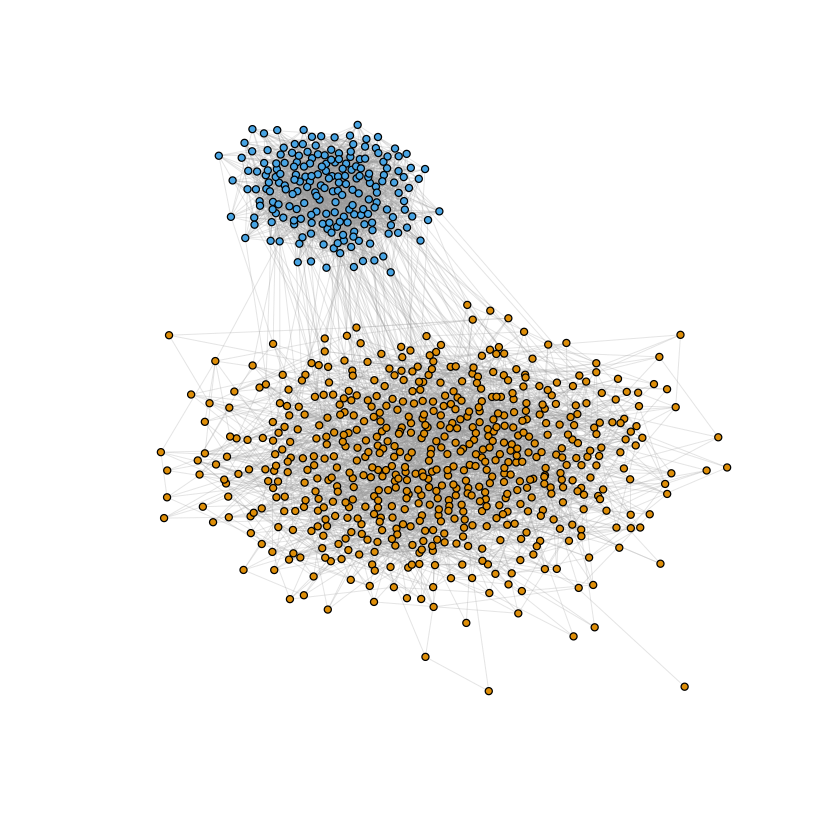

In [31]:
plot(
    g,
    vertex.size=2.5, 
    vertex.label=NA, 
    edge.width=0.2,
    layout=layout.fruchterman.reingold
)

### Computational complexity of walktrap

The following is a simple experimental study of the runtime of the walktrap algorithm applied to the stochastic block model. We apply walktrap to a range of networks that differ only in size, and measure the time taken for each size.

The goal is to show that runtimes increase in a predictable way, and that theoretical estimates of runtime are often worst-case estimates. That is, runtime in practice is often faster.

In [32]:
walktime <- function(g) {
    cluster_walktrap(g, steps=4)
}

# number of nodes, use for quick experiment
nset <- c(1000, 2000, 3000, 4000, 5000)

# number of nodes, use for longer experiment
# nset <- c(1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)

# run times
rtimes <- data.frame(mnn = c(), deltat = c())

for (n in nset){
    # construct graph using stochastic block model
    g <- sample_sbm(
        n, 
        pref.matrix=cbind(c(.015, .001), c(.001, .04)), 
        block.sizes=c(0.6 * n, 0.4 * n)
    )

    # run walktrap, compute elapsed time
    dt <- system.time(walktime(g))
    dt <- dt[["elapsed"]]

    # add elapsed time to runtime, with value of m * n * n
    rtimes <- rbind(
        rtimes, 
        data.frame(
            mnn = c(ecount(g) * vcount(g) * vcount(g)), 
            deltat = c(dt)
        )
    )
}

We have calculated the runtimes using networks of size up to 10000, and we read in this data now.

In [33]:
rtimes <- read.csv("https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/ICSIH/data/walktrap-times.csv")

In [34]:
rtimestheory <- data.frame(rtimes$mnn, 8e-12 * rtimes$mnn)

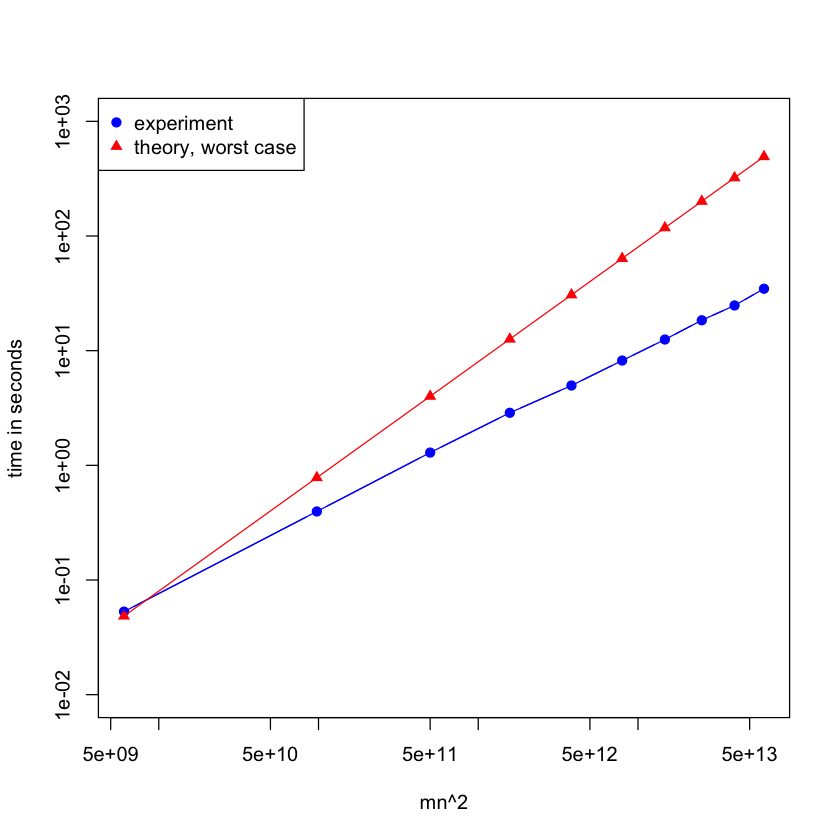

In [35]:
# plot the runtime data
plot(
    rtimes,
    log="xy",
    xlab="mn^2",
    ylab="time in seconds",
    type = "b",
    pch=19,
    col="blue",
    ylim=c(0.01, 1000)
)

points(
    rtimestheory,
    pch=17,
    col="red"
)

lines(rtimes, col = "blue")
lines(rtimestheory, col = "red")

legend(
    "topleft", 
    legend = c("experiment", "theory, worst case"), 
    col = c("blue", "red"), 
    pch = c(19, 17), 
)

The main message here is that graph algorithm runtimes typically increase in a smooth, predictable way as a function of the number of nodes and edges. After measuring a small number of runtimes, we can often extrapolate to estimate the runtime of more ambitious experiments.

A good rule of thumb is that if an experiment is taking too long, make sure you can define a smaller, simpler experiment whose runtime you can measure easily. This will allow you to get an idea of how long bigger experiments should take.

## Force-directed graph layouts

<div class='sidenote-cell'>
<b>Side note</b>
<br><br>
<!-- <b>Force-directed graph layouts</b> -->
<!-- <br><br> -->
Community detection methods often confirm what we can aften observe by visualising the network with an appropriate graph layout algorithm. It is worth thinking about why this is the case.
<br><br>
The Fruchterman-Reingold layout is an example of a so-called force-directed graph layout algorithm. That is, the embedding, or positioning of nodes in two-dimensional space is determined by treating nodes as physical interacting quantities. These algorithms model nodes as interacting through two competing forces, as follows.

1. An electric charge, which is identical for each node such that they repel one another. Each node is repelled by every other node as a function of the distance between them, regardless of whether they share an edge.
2. A spring force between neighbouring nodes, such that nodes sharing an edge are attracted towards each other.

As nodes are driven apart by the repulsive electric force, the spring force acts in the opposite direction, and increases with the distance. Eventually, node positions reach an equilibrium in which the electric force is in balance with the spring force. 
<br><br>
The result is that clusters of nodes, meaning sets of nodes that share more internal than external connections, are situated close together in space. This allows us to get a sense of network structure at a glance, before quantifying clusters numerically.
</div>

# Appendix A. Jupyter notebook configuration

After installing JupyterLab, we need to install the R library [_IRkernel_](https://github.com/IRkernel). This allows us to use the R language within a Jupyter notebook. It is also possible to set a Python kernel. We install _IRkernel_ in the usual way, namely by starting an R session and entering
```
install.packages('IRkernel')
```
Then, when running a Jupyter notebook, we will be given a choice of kernel to run, including R. By installing _IRkernel_, we also install the functions in the package _IRdisplay_, which is a package for using HTML and CSS to format Jupyter notebook cells. Let us load this now.

I have used this to add background colour to certain cells, for example. This is defined in the following cell.

In [120]:
library('IRdisplay')

This allows us to define custom styles. Below we define the style used in our "side note" markdown cells, distinguished by the coloured backgrounds.

In [123]:
# define custom CSS styles
customcss <- "
<style>
  .sidenote-cell {
    background-color: lightblue;
    padding: 10px;
    width: calc(100% + 40px);
    margin-left: -10px;
    box-sizing: border-box;
    overflow-x: hidden;
  }
</style>
"

# display the custom CSS styles
IRdisplay::display_html(customcss)

In [144]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [ ]:
e <- data.frame(
    # u=c("Sam", "Ana"),
    # v=c("Ana", "Caoimhe")
    # u=c("Sam", "Ana", "Caoimhe"),
    # v=c("Ana", "Caoimhe", "Sam")
    # u=c("Ana", "Caoimhe"),
    # v=c("Caoimhe", "Sam"),
    # weight=c(4, 6)
)

g <- graph_from_data_frame(
    e,
    vertices=c("Sam", "Ana", "Caoimhe"),
    directed=FALSE
)

plot(
    g, 
    layout=layout.circle,
    vertex.size = 55,
    vertex.label.cex = 1.5,
    edge.label = E(g)$weight,
    edge.label.cex = 3.5,
    edge.width=3, 
)